## C Integration Examples

Notes:

- SwiftSox package requires sox to be installed: `sudo apt install libsox-dev libsox-fmt-all sox`
- SwiftVips package requires vips to be installed: see `SwiftVips/install.sh` for steps

In [ ]:
%install-location $cwd/swift-install
%install '.package(path: "$cwd/SwiftVips")' SwiftVips
%install '.package(path: "$cwd/SwiftSox")' SwiftSox
%install '.package(path: "$cwd/FastaiNotebook_08_data_block")' FastaiNotebook_08_data_block

Installing packages:
	.package(path: "/home/jhoward/git/fastai_docs/dev_swift/SwiftVips")
		SwiftVips
	.package(path: "/home/jhoward/git/fastai_docs/dev_swift/SwiftSox")
		SwiftSox
	.package(path: "/home/jhoward/git/fastai_docs/dev_swift/FastaiNotebook_08_data_block")
		FastaiNotebook_08_data_block
With SwiftPM flags: []
Working in: /tmp/tmpbl9gqr77/swift-install
/home/jhoward/swift/usr/bin/swift-build: /home/jhoward/anaconda3/lib/libuuid.so.1: no version information available (required by /home/jhoward/swift/usr/lib/swift/linux/libFoundation.so)
/home/jhoward/swift/usr/bin/swift-build: /home/jhoward/anaconda3/lib/libcurl.so.4: no version information available (required by /home/jhoward/swift/usr/lib/swift/linux/libFoundation.so)
/home/jhoward/swift/usr/bin/swiftc: /home/jhoward/anaconda3/lib/libuuid.so.1: no version information available (required by /home/jhoward/swift/usr/bin/swiftc)
Compile Swift Module 'FastaiNotebook_08_data_block' (12 sources)
/home/jhoward/swift/usr/bin/swiftc:

In [ ]:
import Foundation
import Python
import TensorFlow
import Path
import FastaiNotebook_08_data_block

In [ ]:
%include "EnableIPythonDisplay.swift"
let plt = Python.import("matplotlib.pyplot")
let np = Python.import("numpy")
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


### Sox

In [ ]:
import sox
import SwiftSox

In [ ]:
let fd = ReadSoxAudio("SwiftSox/sounds/beep-01a.mp3")

In [ ]:
let sig = fd.pointee.signal

In [ ]:
(sig.rate,sig.precision,sig.channels,sig.length)

▿ 4 elements
  - .0 : 44100.0
  - .1 : 16
  - .2 : 1
  - .3 : 43747


In [ ]:
var samples = [Int32](repeating: 0, count: numericCast(sig.length))

In [ ]:
sox_read(fd, &samples, numericCast(sig.length))

42624


In [ ]:
let shape = TensorShape([Int(sig.length)])
let t = Tensor(shape: shape, scalars: samples).makeNumpyArray()

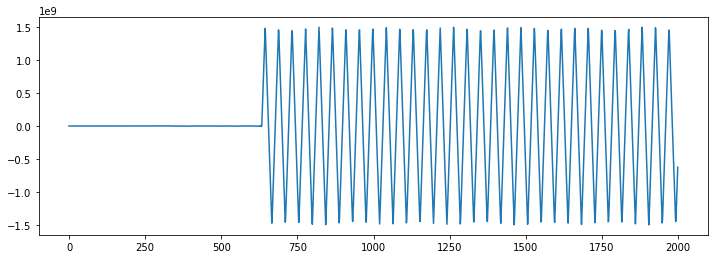

None


In [ ]:
plt.figure(figsize: [12, 4])
plt.plot(t[1000..<3000])
plt.show()

In [ ]:
let display = Python.import("IPython.display")

In [ ]:
display.Audio(t, rate:44100)

<IPython.lib.display.Audio object>


### Vips

In [ ]:
import SwiftVips
import CSwiftVips
import vips

In [ ]:
vipsInit()

In [ ]:
let path = downloadImagenette(sz:"")
let allNames = fetchFiles(path: path/"train", recurse: true, extensions: ["jpeg", "jpg"])
let fNames = Array(allNames[0..<256])
let ns = fNames.map {$0.string}

In [ ]:
let imgpath = ns[0]
let img = vipsLoadImage(imgpath)!

In [ ]:
func vipsToTensor(_ img:Image)->Tensor<UInt8> {
    var sz:Int=0
    let mem = vipsGet(img, &sz)
    defer {free(mem)}
    let shape = TensorShape(vipsShape(img))
    return Tensor(shape: shape, scalars: UnsafeBufferPointer(start: mem, count: sz))
}

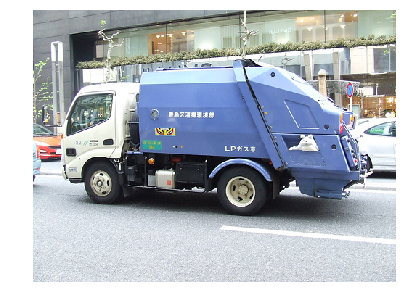

In [ ]:
show_img(vipsToTensor(img))

In [ ]:
let path = Path.cwd/"SwiftCV/Tests/SwiftCVTests/fixtures"